## Logistic Regression for Imbalanced Dataset

In [2]:
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=2 ,
                        n_redundant=0,weights=[0.99],random_state=10)

In [4]:
X

array([[-1.23960391,  1.51333068],
       [ 0.1432964 , -2.76387971],
       [-1.25624258, -2.3612912 ],
       ...,
       [ 0.20129864,  1.8864287 ],
       [-1.63779328,  0.99830374],
       [-0.6725086 , -1.19203033]])

In [6]:
Counter(y)

Counter({0: 9840, 1: 160})

<Axes: xlabel='Feature1', ylabel='Feature2'>

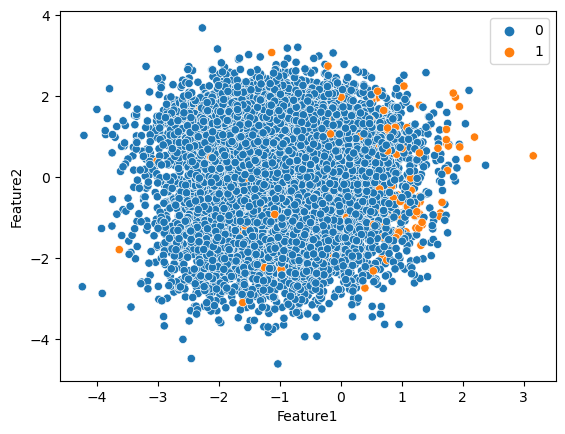

In [9]:
import seaborn as sns
import pandas as pd

# Ensure X is a DataFrame and y is properly aligned
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
y_series = pd.Series(y)

# Scatter plot
sns.scatterplot(x=X_df['Feature1'], y=X_df['Feature2'], hue=y_series)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
## Hyper parameter Tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newfan-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]


In [12]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [13]:
param=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [14]:
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newfan-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=param,cv=cv)

In [18]:
grid.fit(X_train,y_train)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newfan-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [19]:
y_pred=grid.predict(X_test)

In [20]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [21]:
## finding performance metrics for the above model.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.982
[[2946    1]
 [  53    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2947
           1       0.00      0.00      0.00        53

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.96      0.98      0.97      3000

